In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/refs/heads/main/Advertising.csv',
                index_col = 0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Implement Non-Linear Regression

* if we have 1 feature only - TV

In [2]:
X = df[['TV']]
y = df[['sales']]

In [3]:
#library for polynomial transformation

from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=3 , include_bias = False)
X3 = pol.fit_transform(X)
X3

array([[2.30100000e+02, 5.29460100e+04, 1.21828769e+07],
       [4.45000000e+01, 1.98025000e+03, 8.81211250e+04],
       [1.72000000e+01, 2.95840000e+02, 5.08844800e+03],
       [1.51500000e+02, 2.29522500e+04, 3.47726588e+06],
       [1.80800000e+02, 3.26886400e+04, 5.91010611e+06],
       [8.70000000e+00, 7.56900000e+01, 6.58503000e+02],
       [5.75000000e+01, 3.30625000e+03, 1.90109375e+05],
       [1.20200000e+02, 1.44480400e+04, 1.73665441e+06],
       [8.60000000e+00, 7.39600000e+01, 6.36056000e+02],
       [1.99800000e+02, 3.99200400e+04, 7.97602399e+06],
       [6.61000000e+01, 4.36921000e+03, 2.88804781e+05],
       [2.14700000e+02, 4.60960900e+04, 9.89683052e+06],
       [2.38000000e+01, 5.66440000e+02, 1.34812720e+04],
       [9.75000000e+01, 9.50625000e+03, 9.26859375e+05],
       [2.04100000e+02, 4.16568100e+04, 8.50215492e+06],
       [1.95400000e+02, 3.81811600e+04, 7.46059866e+06],
       [6.78000000e+01, 4.59684000e+03, 3.11665752e+05],
       [2.81400000e+02, 7.91859

In [4]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X3,y,train_size=0.75)

In [5]:
from sklearn.linear_model import LinearRegression
model_a = LinearRegression()
model_a.fit(xtrain,ytrain)

ytrainPred = model_a.predict(xtrain)
ytestPred = model_a.predict(xtest)

mae_train = abs(ytrain - ytrainPred).mean()
mae_test = abs(ytest - ytestPred).mean()
print("Mean absolute Error, Train" , mae_train)
print("Mean absolute Error, Test" , mae_test)

Mean absolute Error, Train sales    2.373569
dtype: float64
Mean absolute Error, Test sales    3.028882
dtype: float64


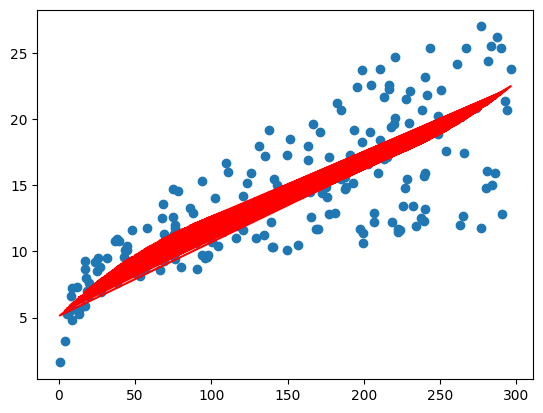

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.plot(X , model_a.predict(X3),'r')
plt.show()

Non-Linear Regression for multiple features

In [7]:
X = df[['TV' , 'radio']]
y = df['sales']

In [8]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2, include_bias=False)
X2 = pol.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X2,y,train_size=0.75)

from sklearn.linear_model import LinearRegression
model_b = LinearRegression()

model_b.fit(xtrain,ytrain)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [11]:
ytrainPred = model_b.predict(xtrain)

ytestPred = model_b.predict(xtest)

maeTrain = abs(ytrain - ytrainPred).mean()
maeTest = abs(ytest - ytestPred).mean()

print("Mean absolute Error, Train" , maeTrain)
print("Mean absolute Error, Test" , maeTest)

Mean absolute Error, Train 0.42294781156850914
Mean absolute Error, Test 0.4100555079485493


Non-Linear Regression using Feature Interaction

In [12]:
X = df[['TV' , 'radio']]
y = df['sales']

from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2, include_bias=False , interaction_only=True)
Xt = pol.fit_transform(X)
#Xt

In [13]:
#Split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xt,y)

#define model and train
from sklearn.linear_model import LinearRegression
model_c = LinearRegression()
model_c.fit(xtrain,ytrain)

#evaluate model performance
ytrainP = model_c.predict(xtrain)
ytestP = model_c.predict(xtest)

maeTrain = abs(ytrain - ytrainP).mean()
maeTest = abs(ytest - ytestP).mean()

print("Mean absolute error, Train" , maeTrain)
print("Mean absolute error, Test" , maeTest)

Mean absolute error, Train 0.656813581256767
Mean absolute error, Test 0.6271315888857566


Prediction

In [14]:
tv = 56.8
radio = 67.9

print(model_b.predict([[tv, radio, tv**2 , tv*radio , radio**2]]))
print(model_c.predict([[tv, radio, tv*radio]]))

[14.45585768]
[14.01978529]
